In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import yfinance as yf
import datetime

from valueinvesting import utils as utils

# 1. Load raw input
## Hardcoded block

In [2]:
evaluate_last_X_years = True
X=10
currency_pair = 'EUR=X'
numbers_in_currency = 'EUR'
share_name = 'TKA.DE'

# 1.1 Calculate Share numbers from total distributed dividend (CFS) and dividend amount

# 1.2. Raw input statement data

In [3]:
route = f"../data/input/{share_name}_data.csv"
data = pd.read_csv(route, sep=';', parse_dates=['date', 'real_date'])
# replace -, extend missing 0-s, fix datatype
data = utils.replace_format_input(data)

In [4]:
owned_shares = pd.read_csv('../data/extras/owned_stocks.csv', sep=';', parse_dates=['date'])
owned_shares = owned_shares.loc[(owned_shares['stock'] == share_name) & (owned_shares['active'] == 'yes')]

## (OPTIONAL) Time Filtering - Last 7 years daat

In [5]:
if evaluate_last_X_years:
    data = data[data['date'] > datetime.datetime.today() - datetime.timedelta(days=X*366+93)]
    data = data.reset_index(drop=True)

data.head()

,date,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,curr_assets,goodwill,...,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,shares,real_date
0,2014-06-30,10720,-9049,1671,43,3511,5711,7864,20252,0,...,4518,0,1190,17383,6455,32339,154,-273,566.94,2014-08-09
1,2014-09-30,11135,-9591,1544,-49,4030,5808,7529,20447,0,...,4936,0,1071,17912,6651,33447,1071,-480,566.94,2014-11-14
2,2014-12-31,10044,-8414,1630,47,3641,5353,8043,20359,0,...,4843,0,1268,17818,6601,33772,-386,-246,566.94,2015-02-14
3,2015-03-31,10995,-9362,1633,47,3884,5884,7514,21329,0,...,4952,0,1753,18577,6788,35264,212,-266,566.94,2015-05-10
4,2015-06-30,11178,-9340,1838,191,4032,6127,7432,21452,0,...,5080,0,1956,18631,6476,34135,450,-291,566.94,2015-08-09


## Calculate date when quaterly reports could be available

In [6]:
data = utils.calculate_real_date(data)

# 2. Filter out unnecesary columns

In [7]:
data = utils.filter_raw_data(data)
data.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,intangible_assets,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex
36,2023-06-30,2023-08-09,622.53,9598,-8397,1201,107,6163,7165,8131,...,1853,34967,4449,0,1696,13303,1240,21536,599,-267
37,2023-09-30,2023-11-14,622.53,8813,-9438,-625,-1988,7339,6523,7553,...,1828,33291,4270,0,1712,13117,1313,21452,1396,-851
38,2023-12-31,2024-02-14,622.53,8181,-7383,798,-304,6629,5767,7986,...,1784,32068,3926,0,1653,12420,1276,21290,-424,-300
39,2024-03-31,2024-05-13,622.53,9064,-7931,1133,-72,4867,4699,7890,...,1774,30839,4355,0,833,12003,671,19234,113,-284
40,2024-06-30,2024-08-12,622.53,8986,-7828,1158,64,4685,4899,7908,...,1775,30157,4396,0,841,11470,665,18490,249,-507


## Pull historical average USD national currency rates and add to the dataframe

In [8]:
data['usd_nat_currency'] = utils.daily_price(
    ticker=currency_pair,
    end=data['date'],
    days_earlier=90
    )

# drop rows, when USD rates wasn't available
data = data[data['usd_nat_currency'].notna()]

data.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
36,2023-06-30,2023-08-09,622.53,9598,-8397,1201,107,6163,7165,8131,...,34967,4449,0,1696,13303,1240,21536,599,-267,0.918362
37,2023-09-30,2023-11-14,622.53,8813,-9438,-625,-1988,7339,6523,7553,...,33291,4270,0,1712,13117,1313,21452,1396,-851,0.918837
38,2023-12-31,2024-02-14,622.53,8181,-7383,798,-304,6629,5767,7986,...,32068,3926,0,1653,12420,1276,21290,-424,-300,0.929674
39,2024-03-31,2024-05-13,622.53,9064,-7931,1133,-72,4867,4699,7890,...,30839,4355,0,833,12003,671,19234,113,-284,0.920544
40,2024-06-30,2024-08-12,622.53,8986,-7828,1158,64,4685,4899,7908,...,30157,4396,0,841,11470,665,18490,249,-507,0.928647


## Convert USD values related to IS, BS, CFS to national currency

In [9]:
# convert columns into national currency if necessary
if numbers_in_currency == 'USD':
    data_nat_curr = utils.convert_national_currency(input_data=data, currency=data)
else:
    data_nat_curr = data.copy()
data_nat_curr.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
36,2023-06-30,2023-08-09,622.53,9598,-8397,1201,107,6163,7165,8131,...,34967,4449,0,1696,13303,1240,21536,599,-267,0.918362
37,2023-09-30,2023-11-14,622.53,8813,-9438,-625,-1988,7339,6523,7553,...,33291,4270,0,1712,13117,1313,21452,1396,-851,0.918837
38,2023-12-31,2024-02-14,622.53,8181,-7383,798,-304,6629,5767,7986,...,32068,3926,0,1653,12420,1276,21290,-424,-300,0.929674
39,2024-03-31,2024-05-13,622.53,9064,-7931,1133,-72,4867,4699,7890,...,30839,4355,0,833,12003,671,19234,113,-284,0.920544
40,2024-06-30,2024-08-12,622.53,8986,-7828,1158,64,4685,4899,7908,...,30157,4396,0,841,11470,665,18490,249,-507,0.928647


# 3. Calculate input to Value Raios (eps, bv per share, fcf)
## filter out unwanted columns

In [10]:
filtered_nat_curr = utils.calculate_input_value_ratios(data_nat_curr)

## Calculate input values to value ratios

In [11]:
ratios_nat_curr = utils.ratios_input_filter(filtered_nat_curr)

## Calculate performance parameters (current ratio, ROA, ROE, margins, D/E)

In [12]:
ratios_nat_curr = utils.evaluate_performance(input=filtered_nat_curr, output=ratios_nat_curr)

# 4. Pull historical share prices and merge with sattement data

In [13]:
# pull weekly share prices and merge with the value ratios
merged_nat_curr = utils.add_share_prices_to_value_ratios(share_name, data, ratios_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,cash,...,equity_ratio,debt_ratio,acc_rec_ratio,acc_pay_ratio,cash_turnover,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe
0,2014-08-11,18.884836,2014-06-30,10720.0,0.0,5.159276,566.94,0.0,0.0,3511.0,...,0.082946,0.917054,0.0,0.0,0.0,0.0,0.155877,0.004011,0.0,0.0
1,2014-08-18,19.275778,2014-06-30,10720.0,0.0,5.159276,566.94,0.0,0.0,3511.0,...,0.082946,0.917054,0.0,0.0,0.0,0.0,0.155877,0.004011,0.0,0.0
2,2014-08-25,19.432158,2014-06-30,10720.0,0.0,5.159276,566.94,0.0,0.0,3511.0,...,0.082946,0.917054,0.0,0.0,0.0,0.0,0.155877,0.004011,0.0,0.0
3,2014-09-01,20.301428,2014-06-30,10720.0,0.0,5.159276,566.94,0.0,0.0,3511.0,...,0.082946,0.917054,0.0,0.0,0.0,0.0,0.155877,0.004011,0.0,0.0
4,2014-09-08,19.979475,2014-06-30,10720.0,0.0,5.159276,566.94,0.0,0.0,3511.0,...,0.082946,0.917054,0.0,0.0,0.0,0.0,0.155877,0.004011,0.0,0.0


# Calculate price ratios (P/E, P/B, P/S, P/FCF)

In [14]:
merged_nat_curr = utils.price_ratios(merged_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,cash,...,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe,pe_ratio,pb_ratio,ps_ratio,ev_revenue,pfcf_ratio
0,2014-08-11,18.884836,2014-06-30,10720.0,0.0,5.159276,566.94,0.0,0.0,3511.0,...,0.0,0.155877,0.004011,0.0,0.0,inf,3.660365,inf,inf,inf
1,2014-08-18,19.275778,2014-06-30,10720.0,0.0,5.159276,566.94,0.0,0.0,3511.0,...,0.0,0.155877,0.004011,0.0,0.0,inf,3.736140,inf,inf,inf
2,2014-08-25,19.432158,2014-06-30,10720.0,0.0,5.159276,566.94,0.0,0.0,3511.0,...,0.0,0.155877,0.004011,0.0,0.0,inf,3.766450,inf,inf,inf
3,2014-09-01,20.301428,2014-06-30,10720.0,0.0,5.159276,566.94,0.0,0.0,3511.0,...,0.0,0.155877,0.004011,0.0,0.0,inf,3.934937,inf,inf,inf
4,2014-09-08,19.979475,2014-06-30,10720.0,0.0,5.159276,566.94,0.0,0.0,3511.0,...,0.0,0.155877,0.004011,0.0,0.0,inf,3.872535,inf,inf,inf


# Calculate Dividend yield and currency-share price correlation

In [15]:
# get daily historical USD-national currency rates
usd_nat_curr = utils.get_historical_currency_rate(currency_pair, merged_nat_curr)

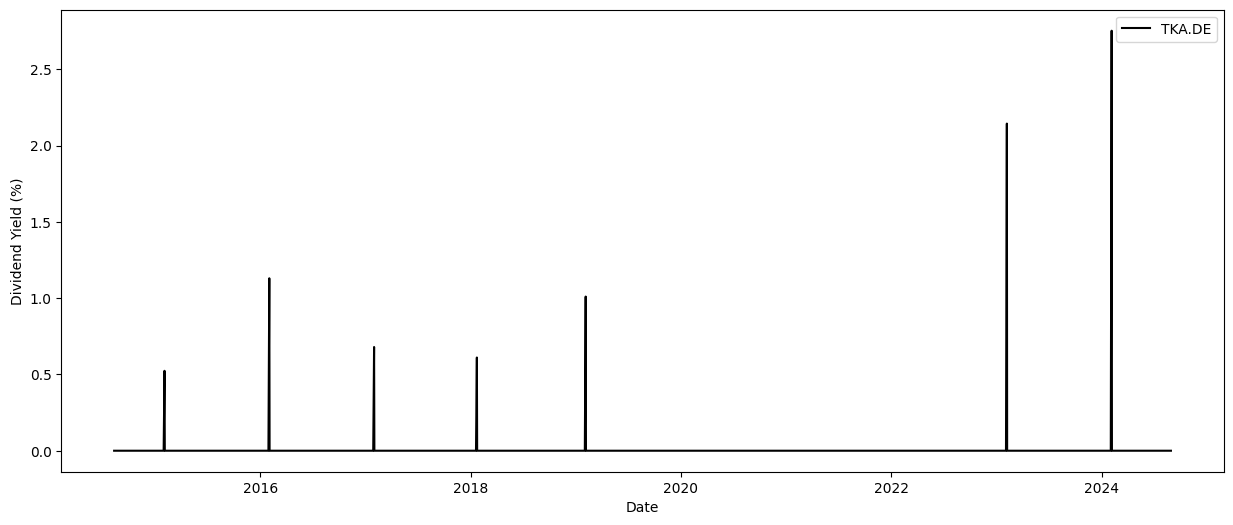

In [16]:
# get share prices and dividend yield data
ticker_all_price = utils.get_historical_share_dividend(share_name, merged_nat_curr)

currency_rate   -0.343226
share_price      1.000000
Name: share_price, dtype: float64


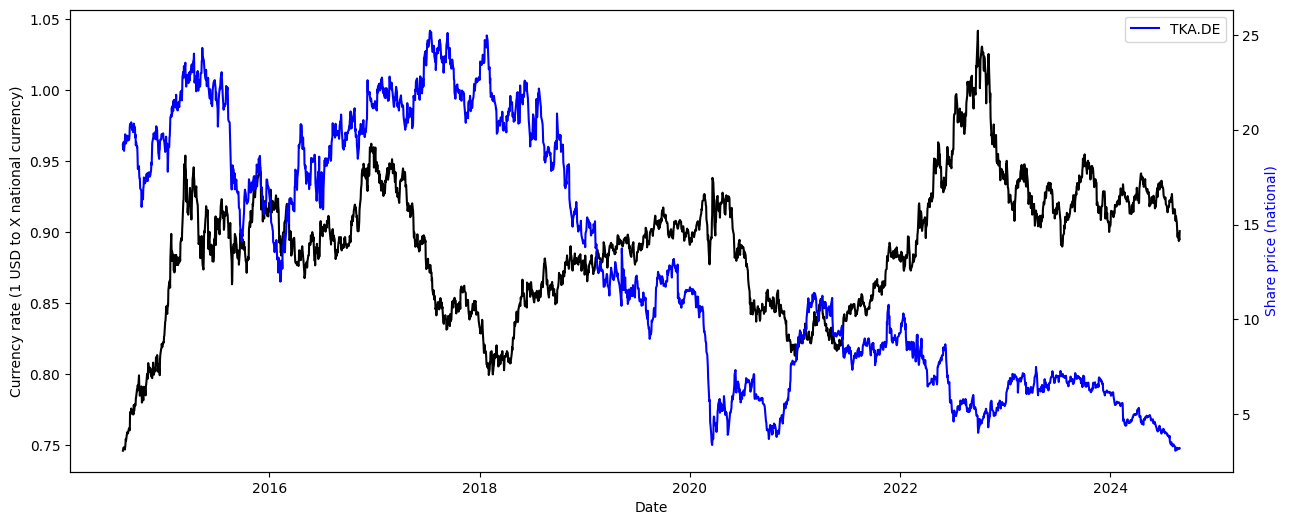

In [17]:
# Pearson's correlation coefficient between share price and USD - national currency rate
utils.get_currency_share_price_correlation(share_name, usd_nat_curr, ticker_all_price)

# Share price and value ratios

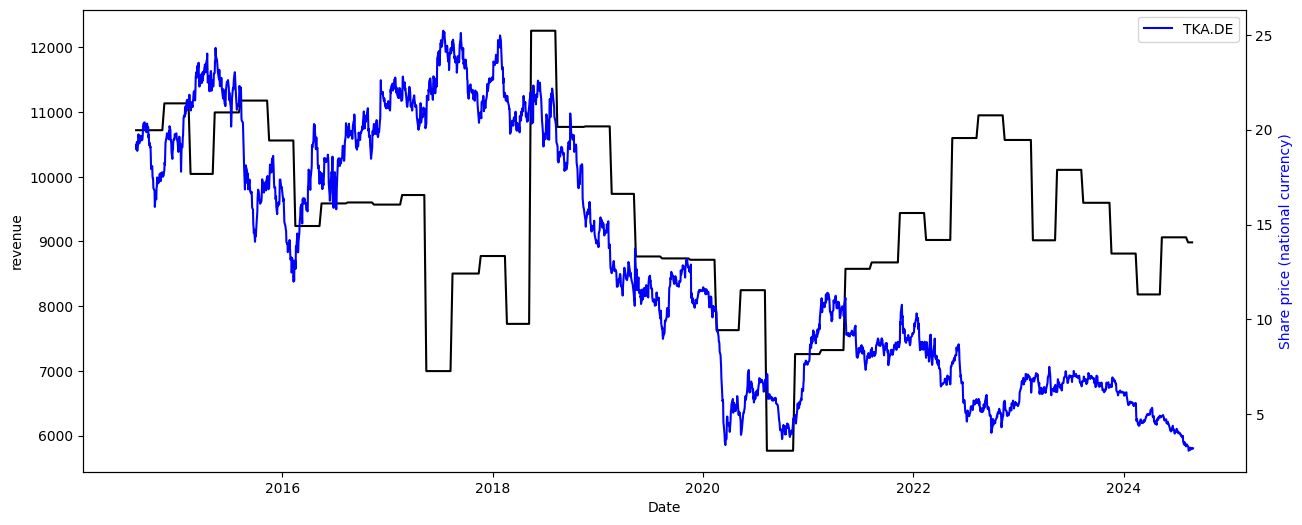

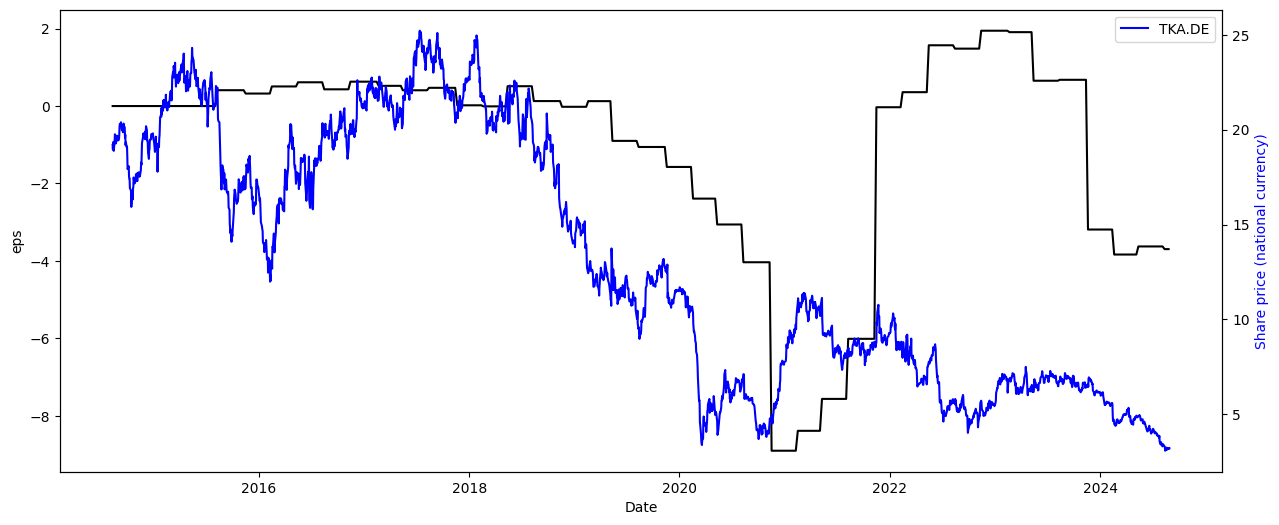

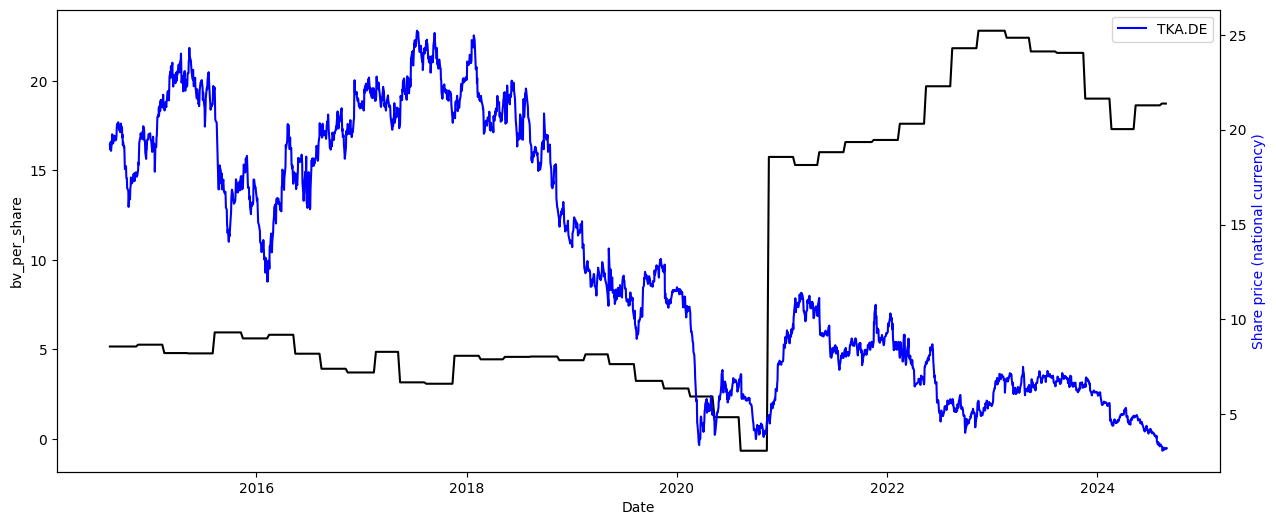

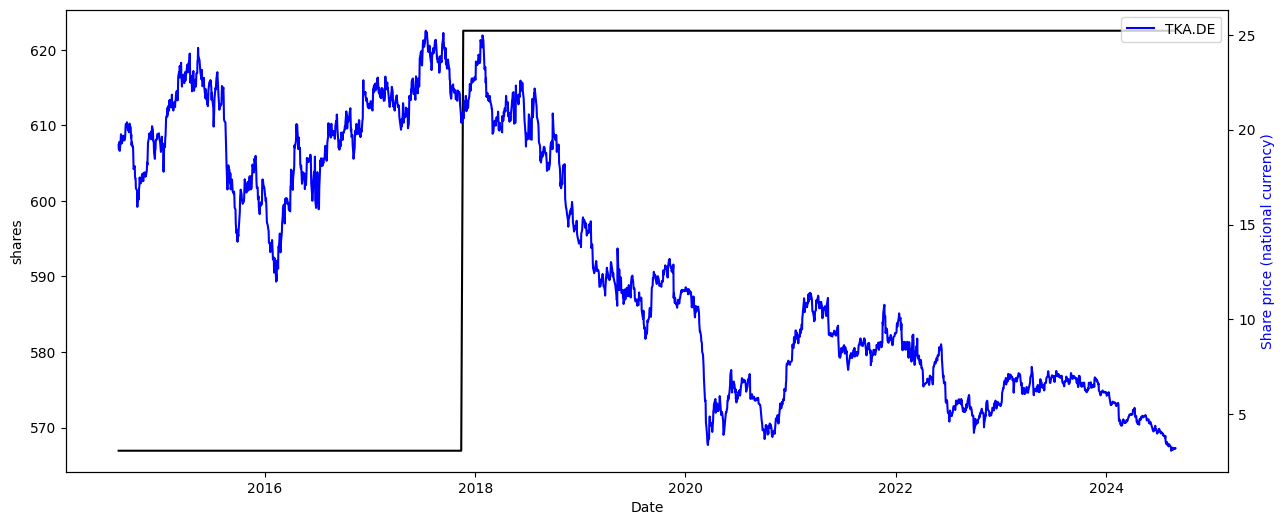

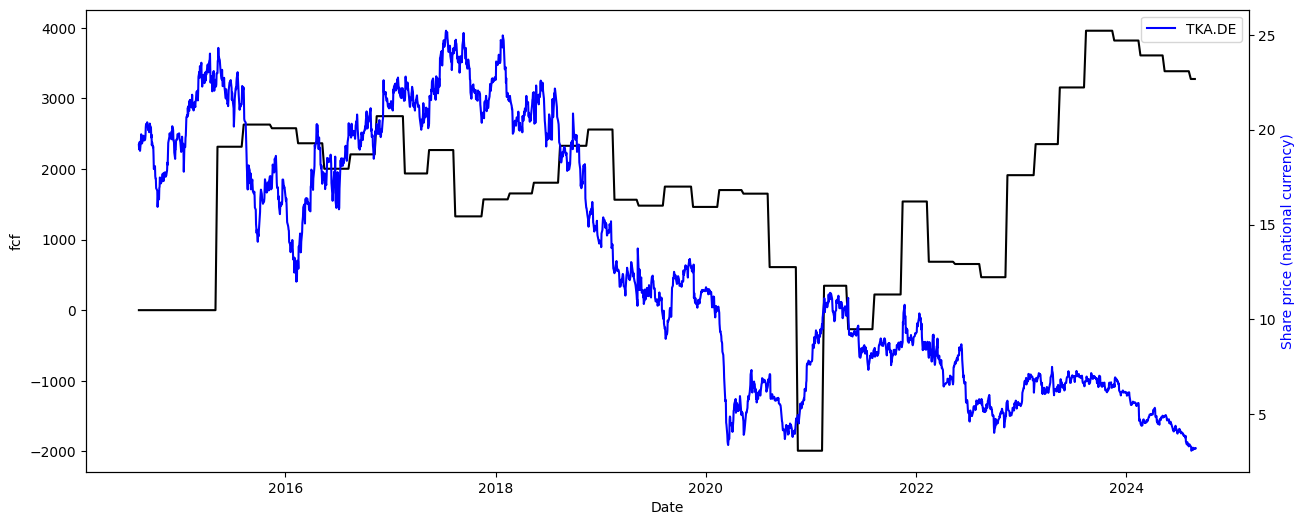

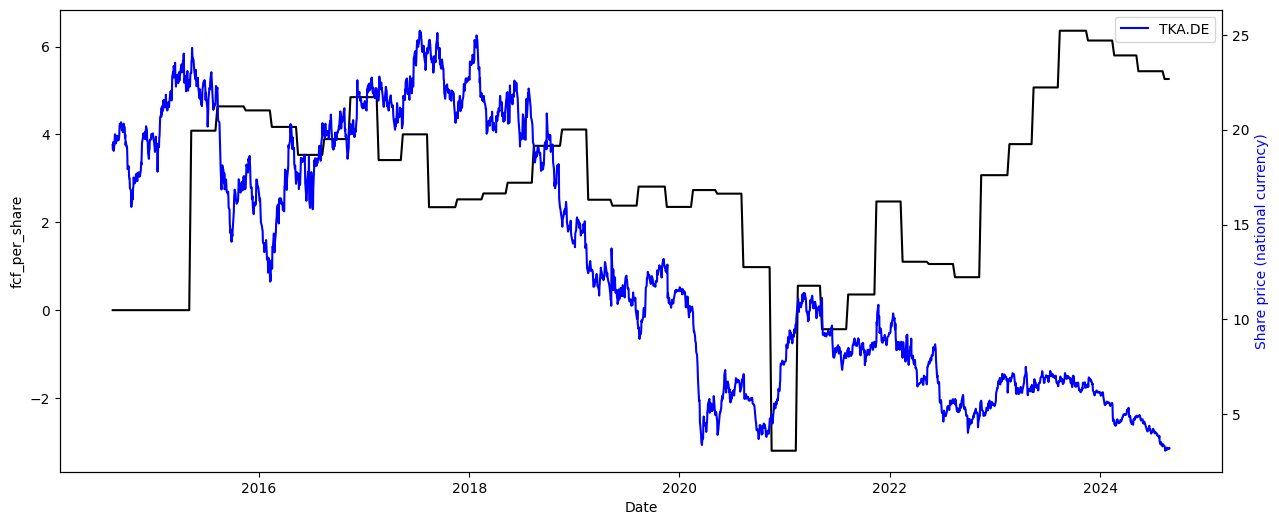

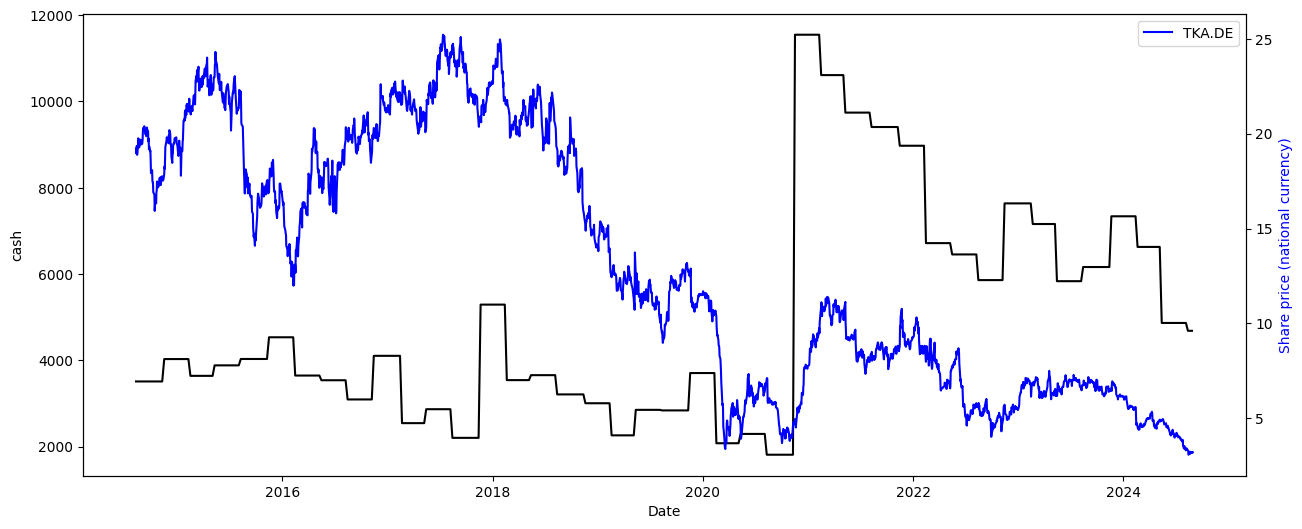

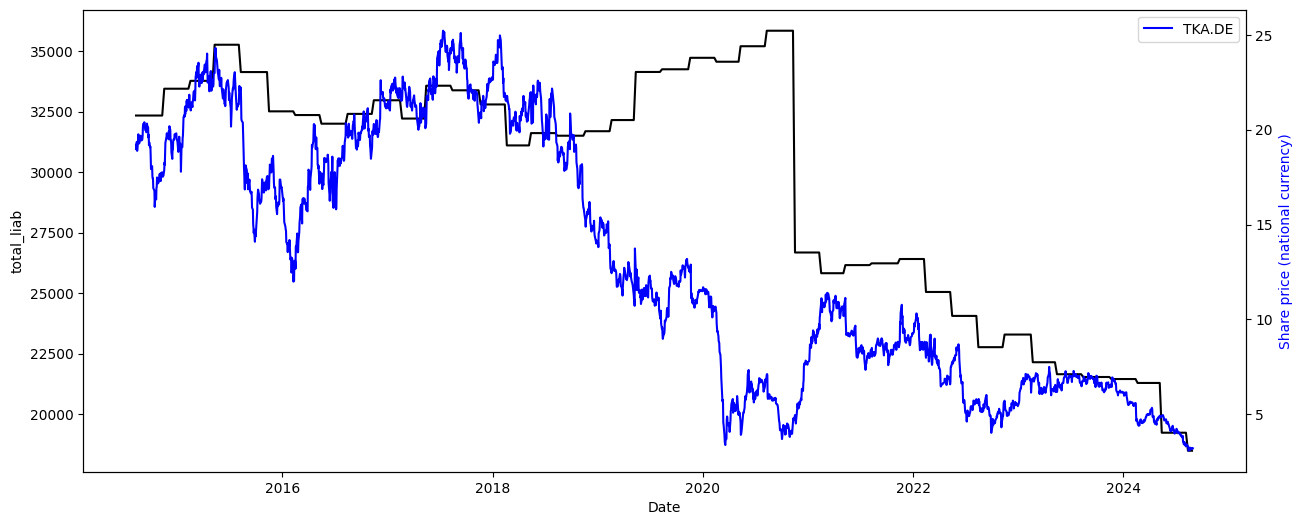

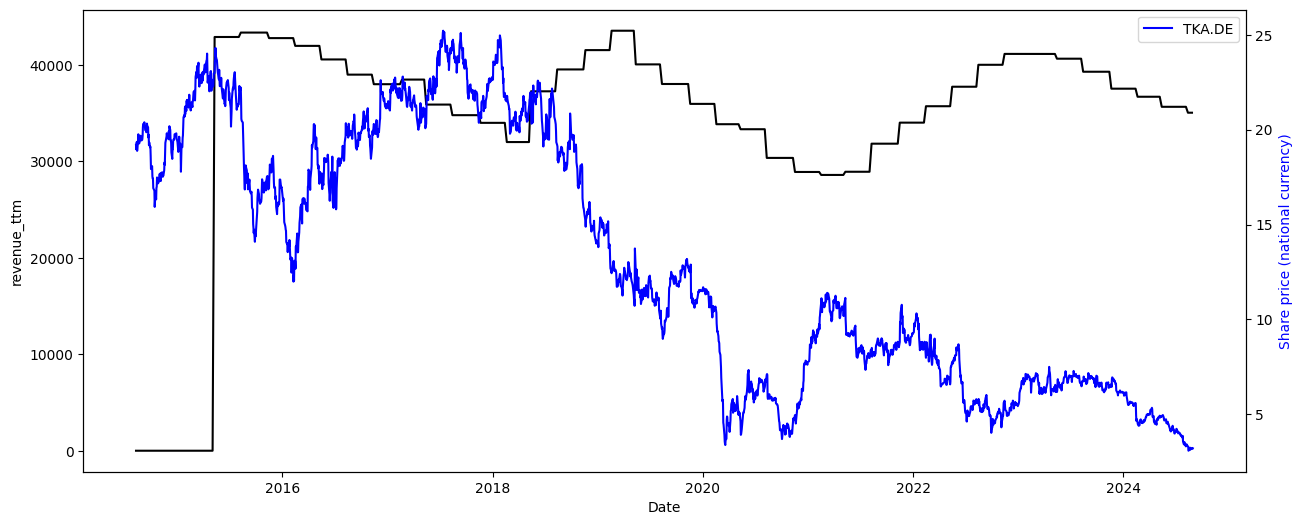

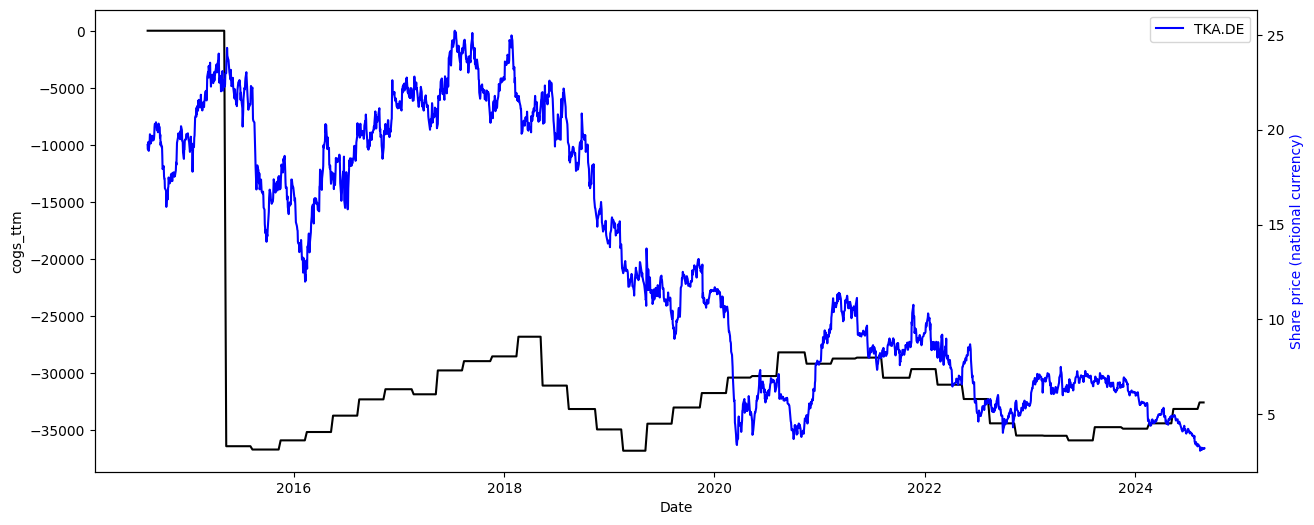

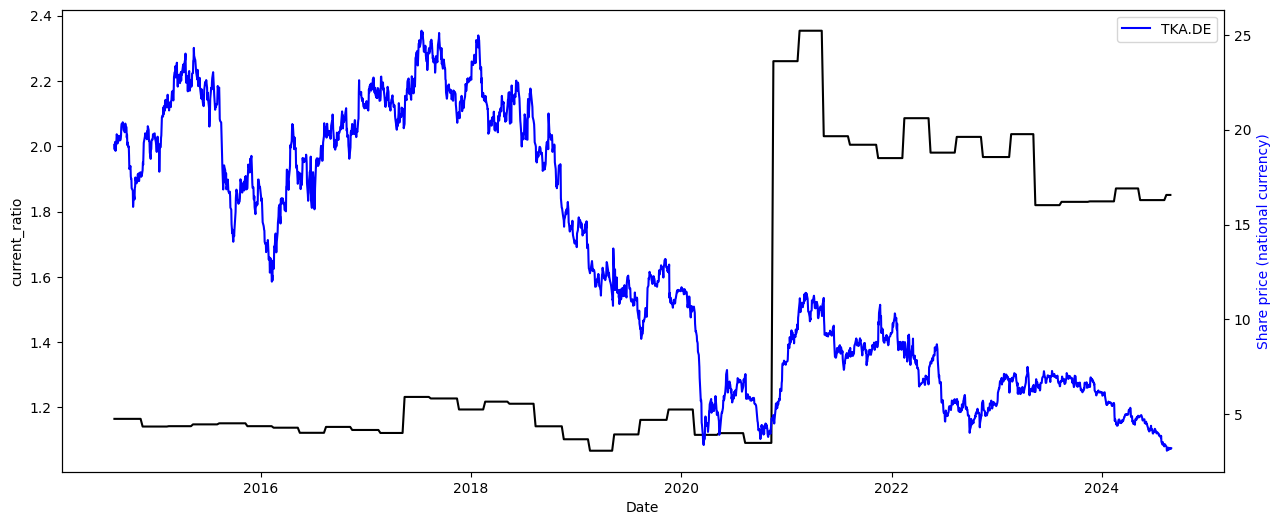

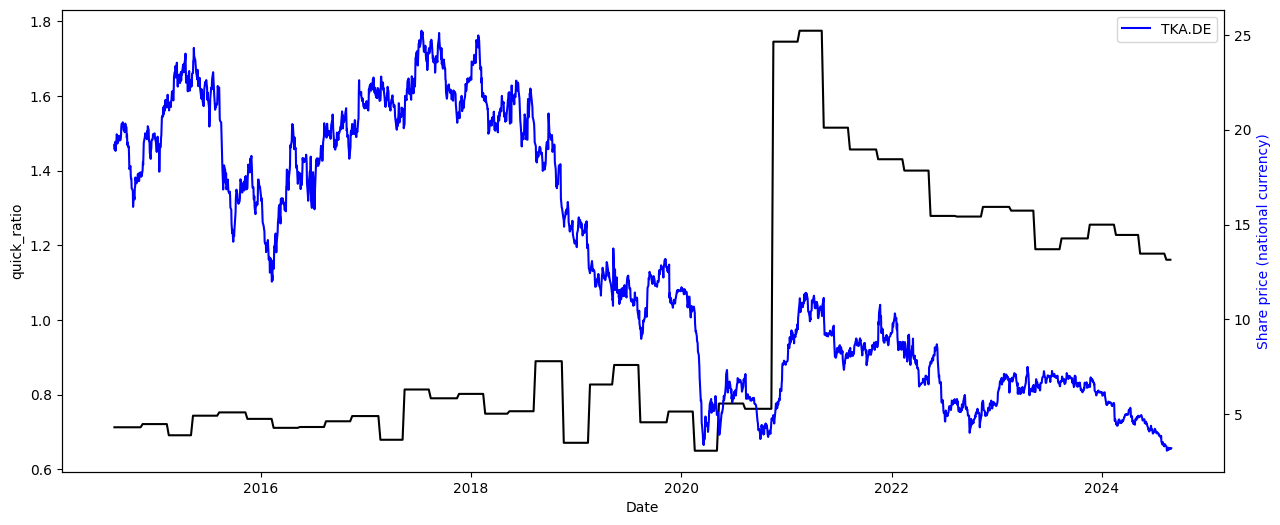

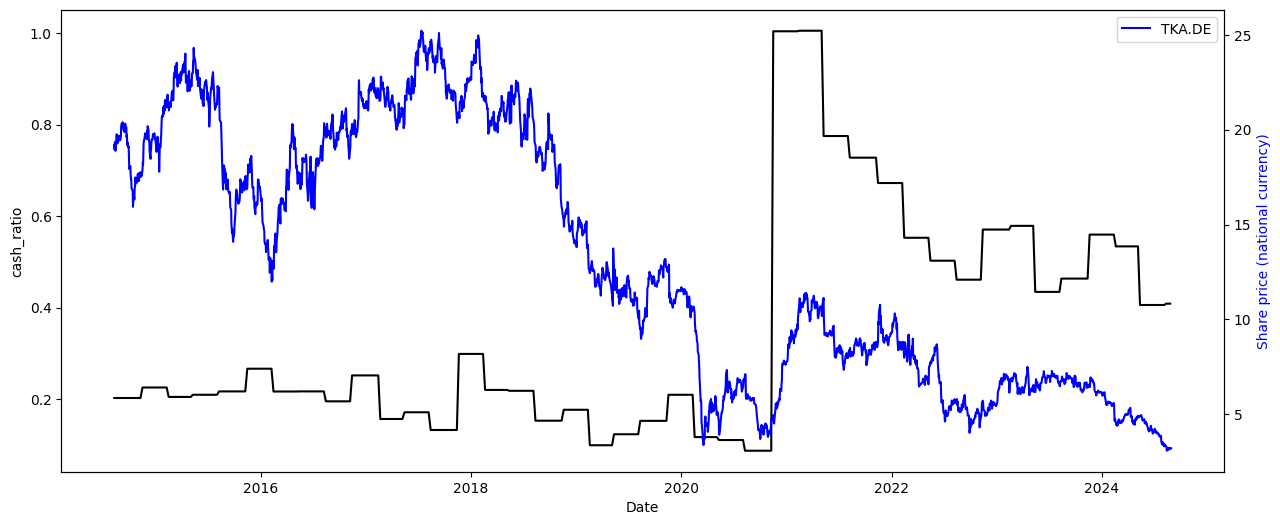

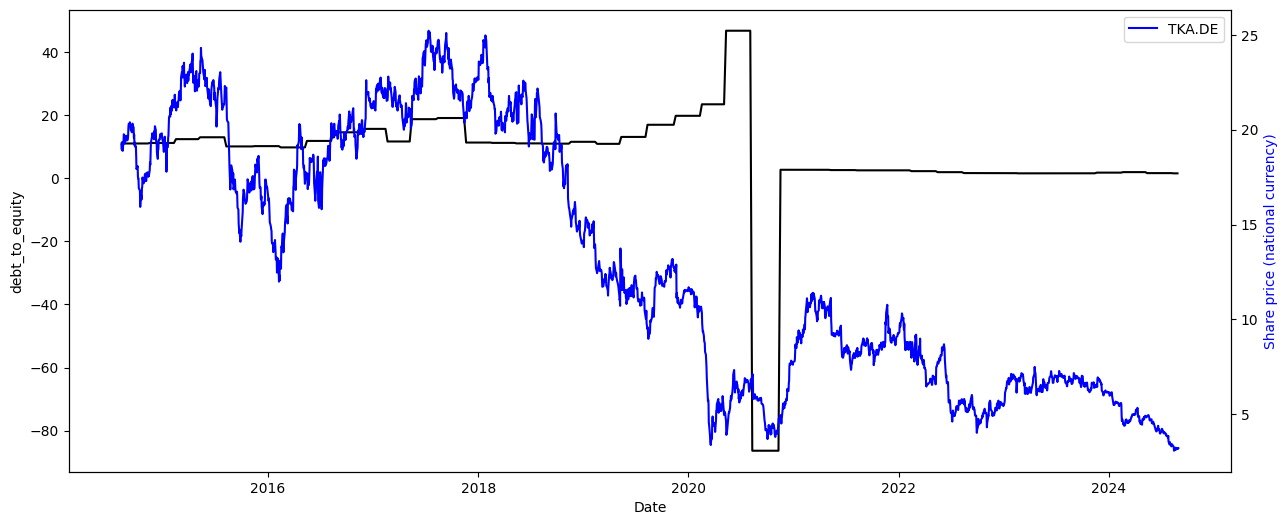

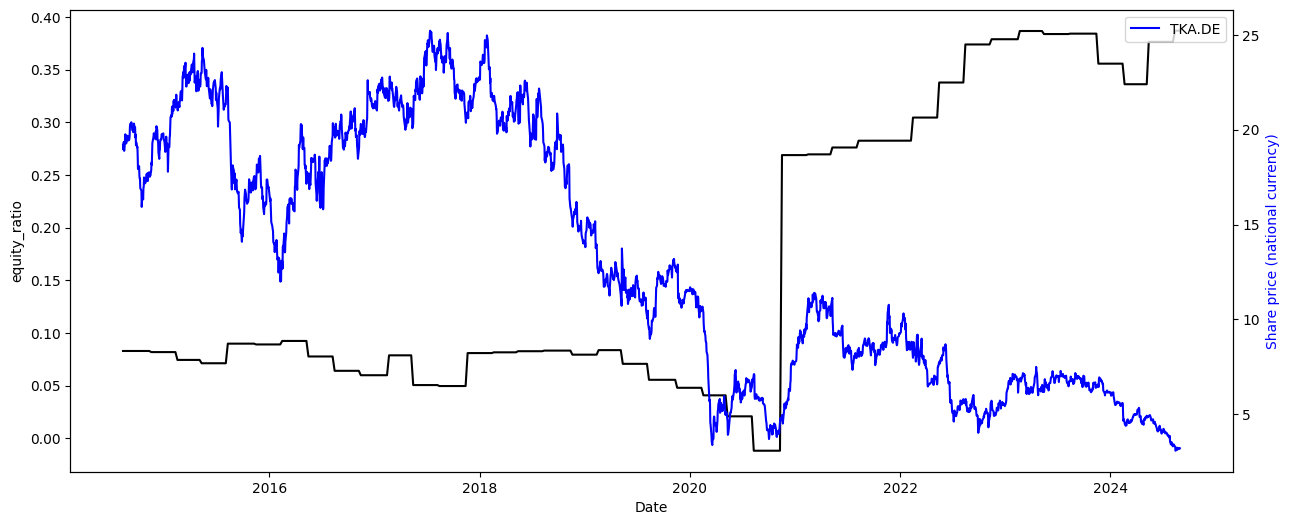

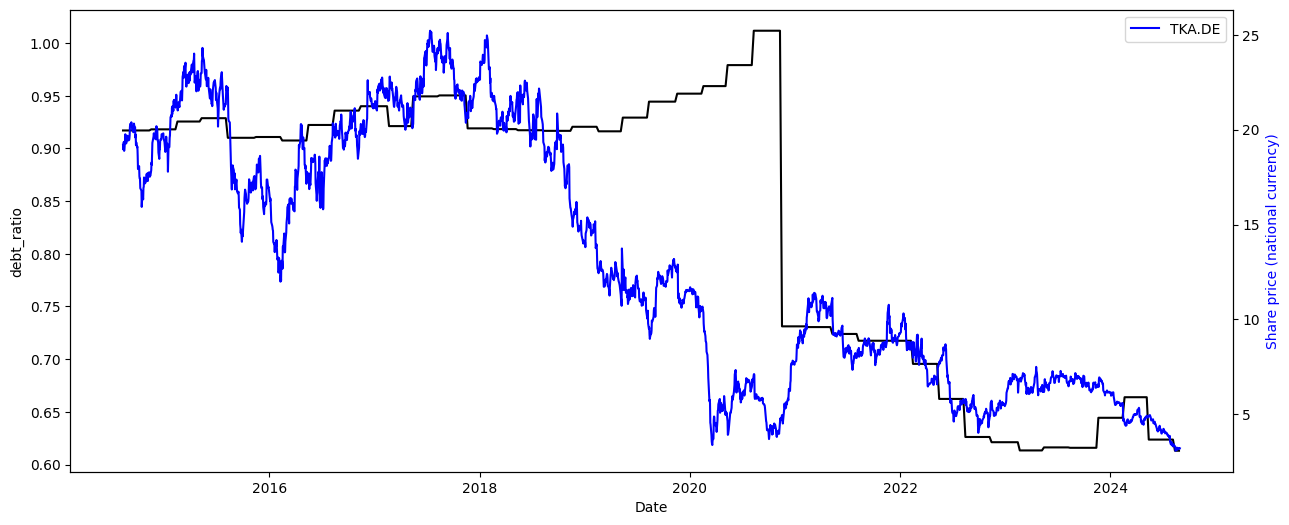

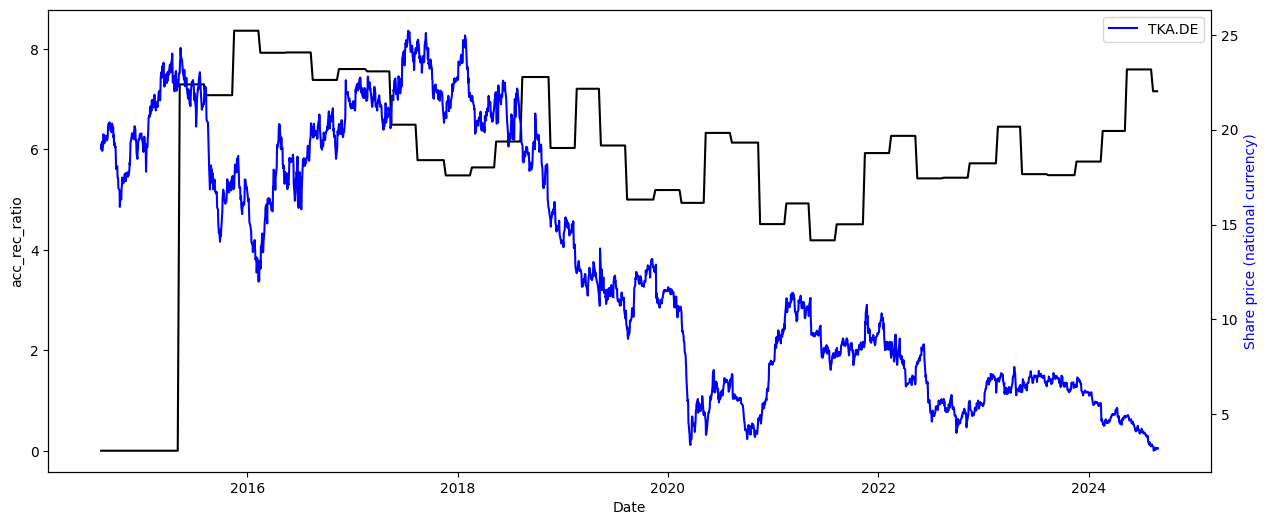

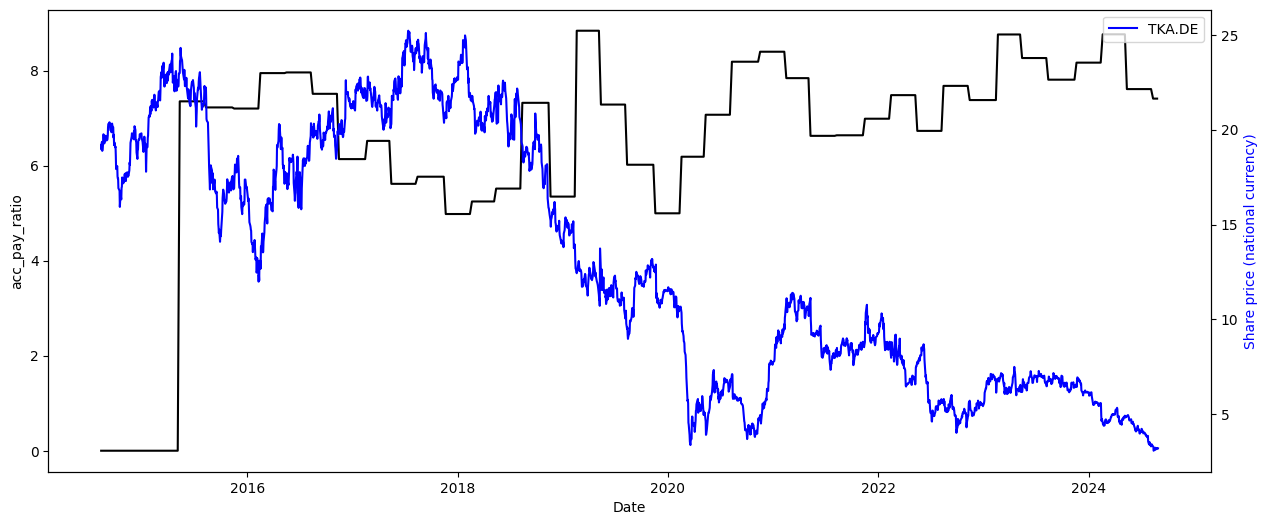

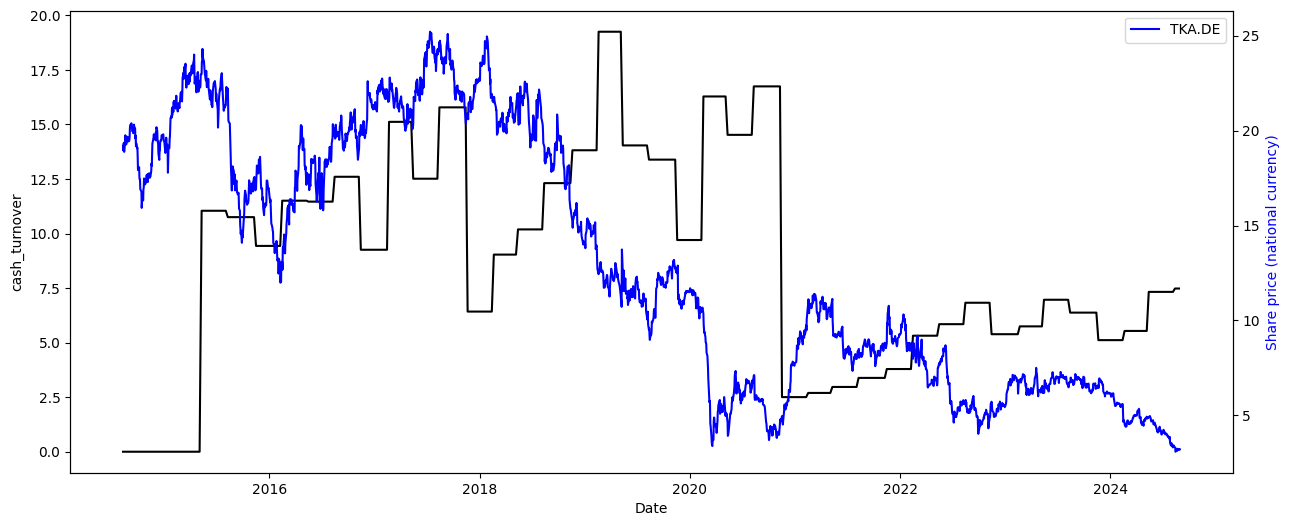

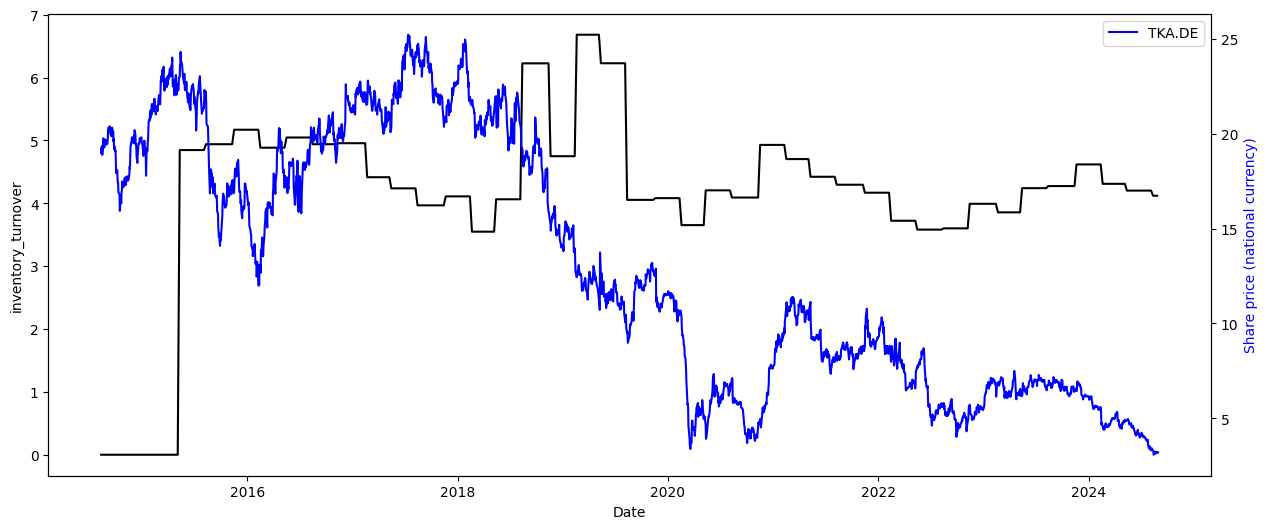

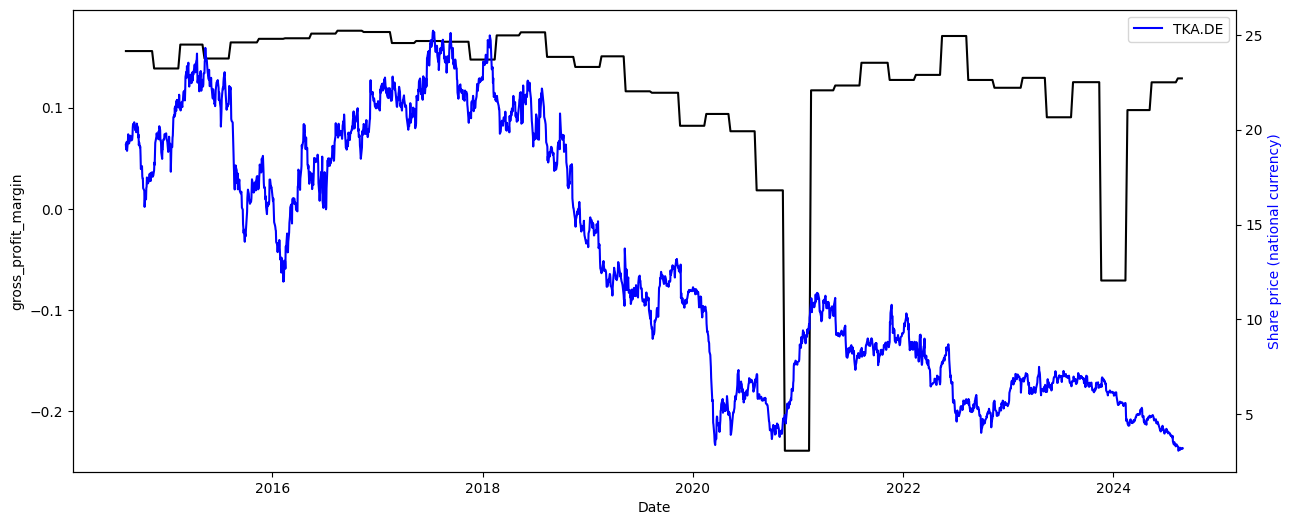

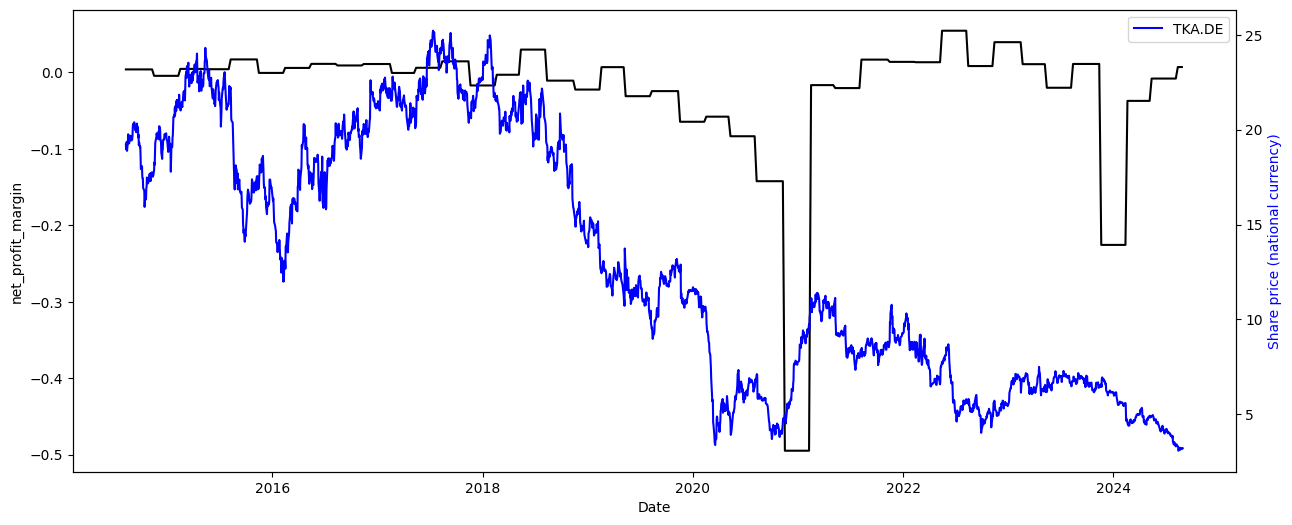

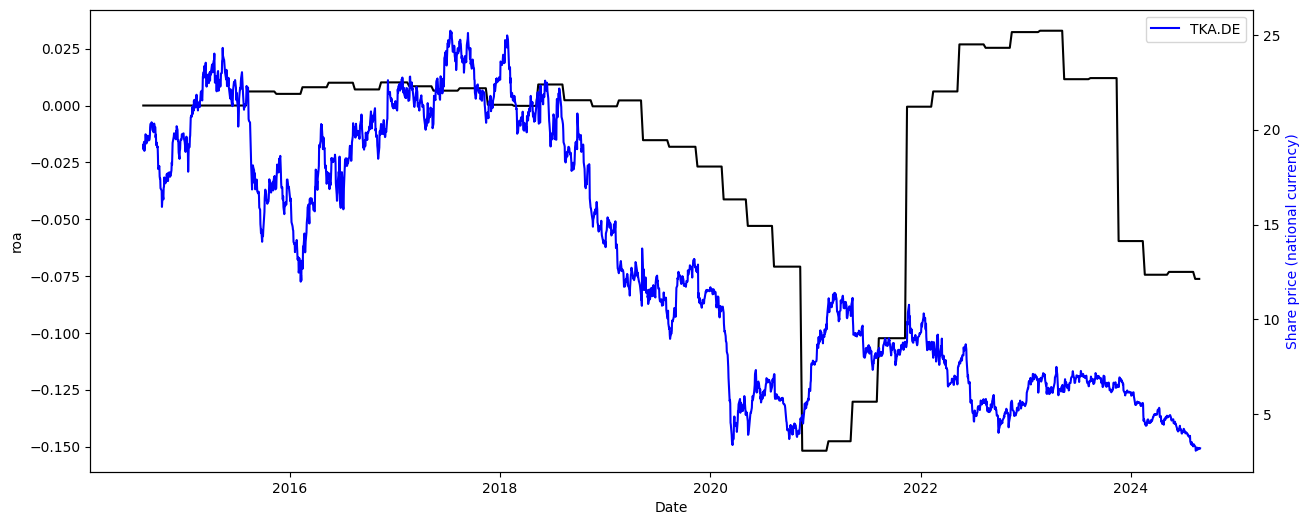

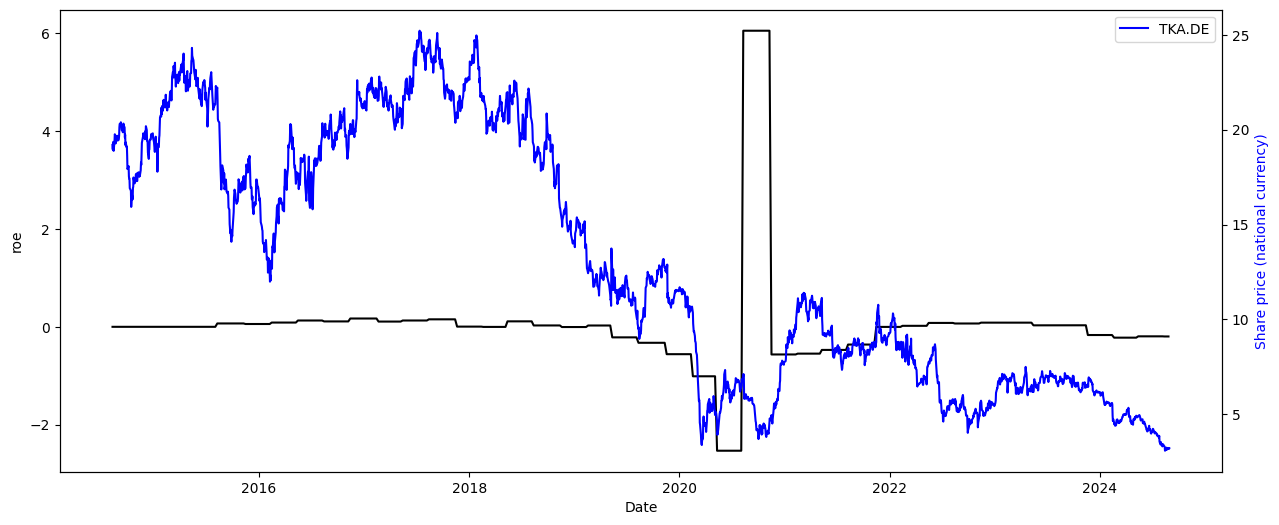

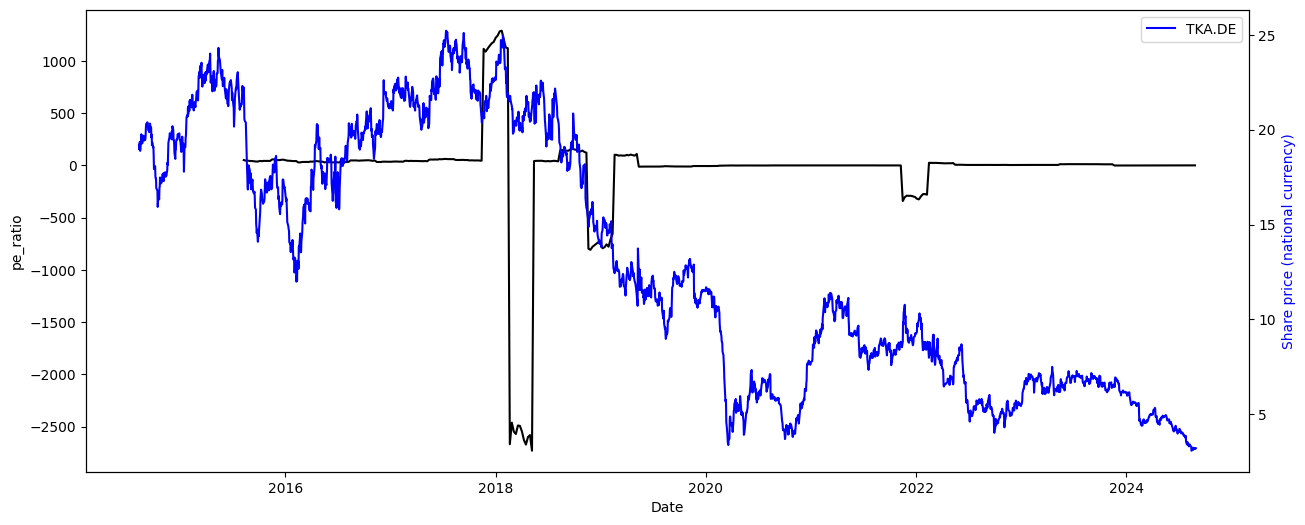

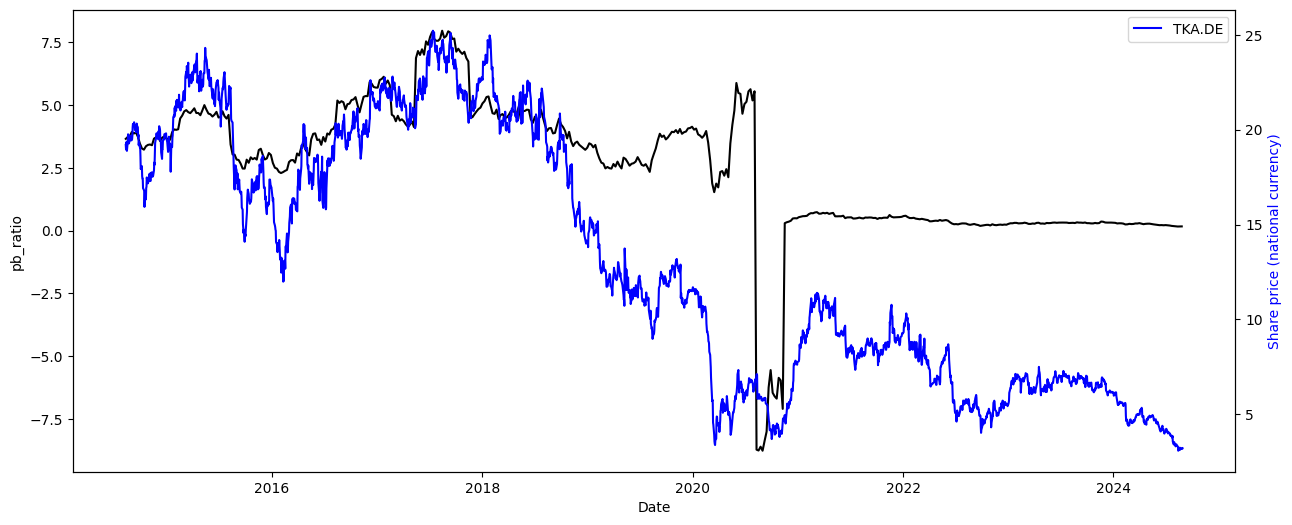

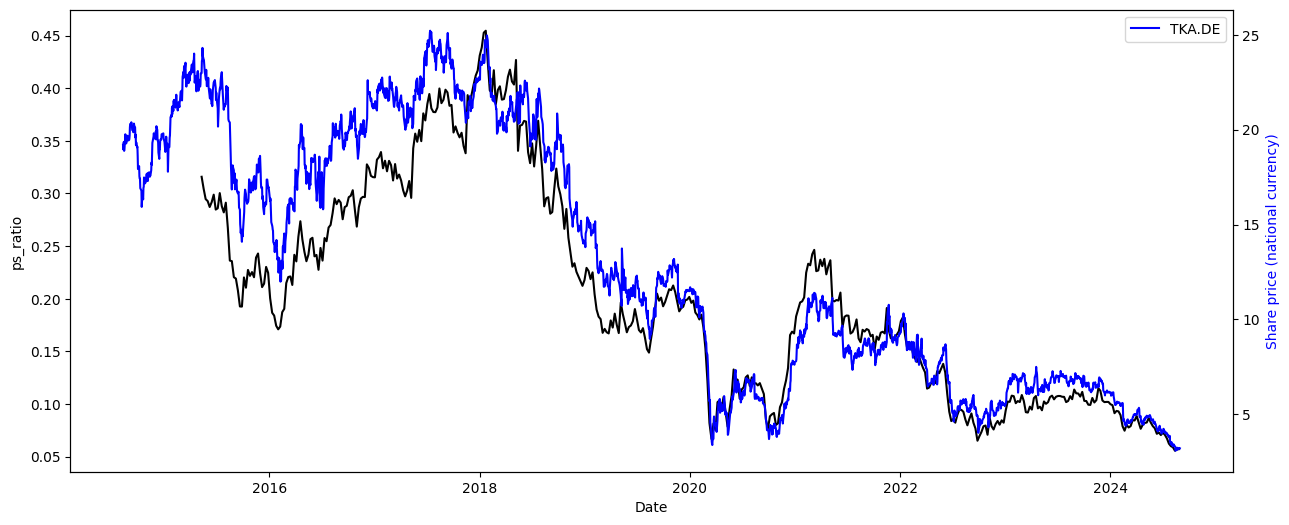

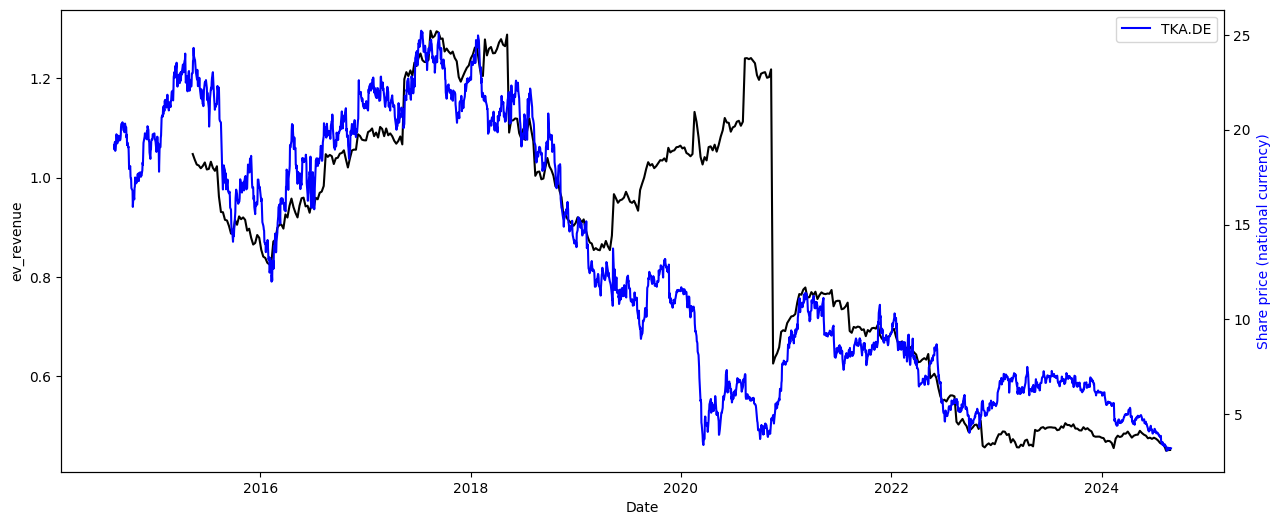

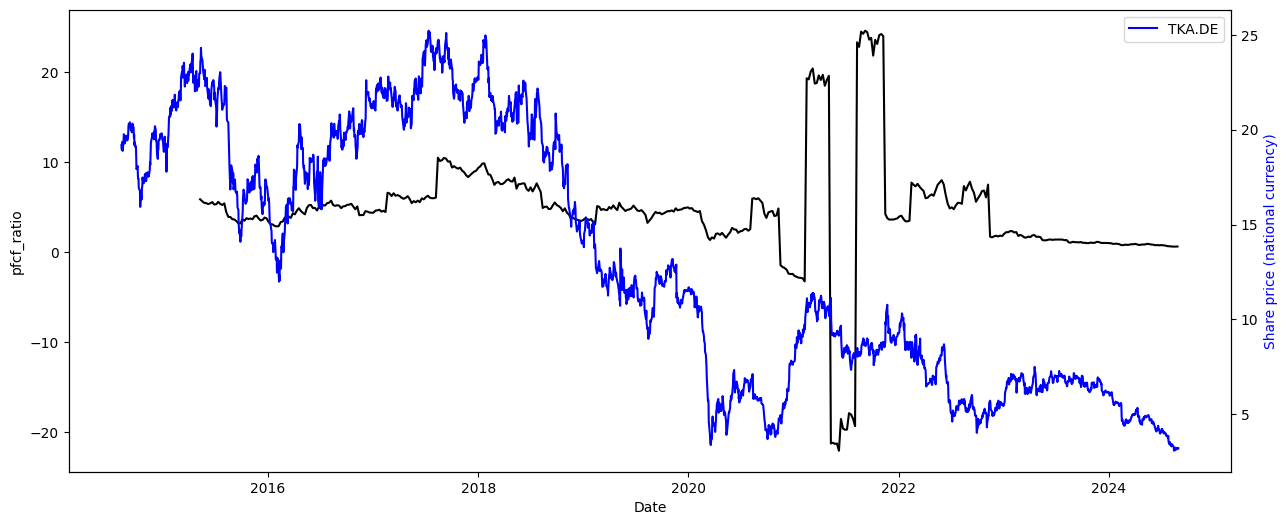

In [18]:
for column in merged_nat_curr.columns[3:]:
    fig, ax1 = plt.subplots(figsize=(15, 6))

    ax2 = ax1.twinx()
    ax1.plot(merged_nat_curr['real_date'], merged_nat_curr[column], color='k', label=merged_nat_curr)
    ax2.plot(ticker_all_price.index, ticker_all_price['Close'], color='b', label=share_name)

    ax1.set_xlabel('Date')
    ax1.set_ylabel(column, color='k')
    ax2.set_ylabel('Share price (national currency)', color='b')

    plt.legend()
    plt.show()

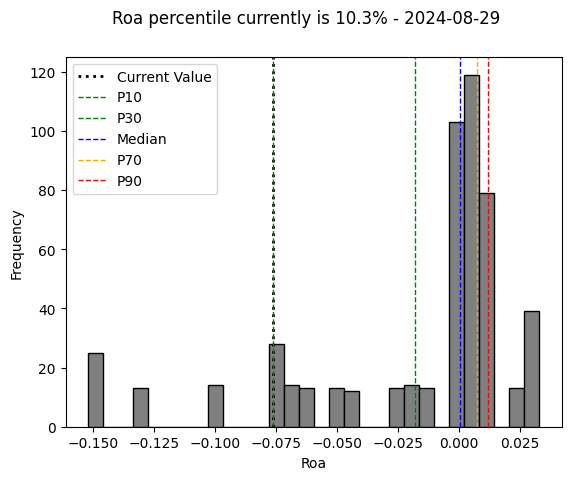

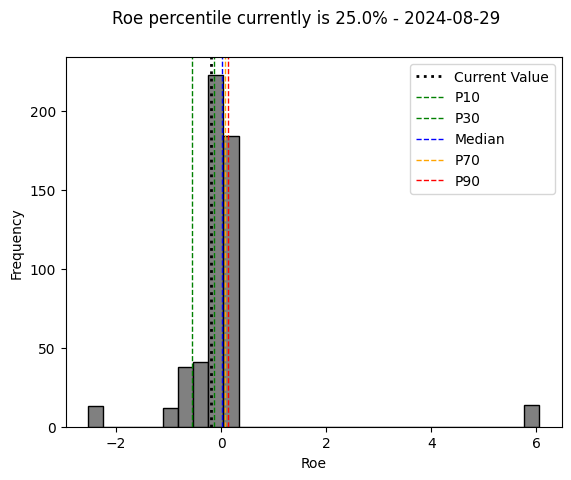

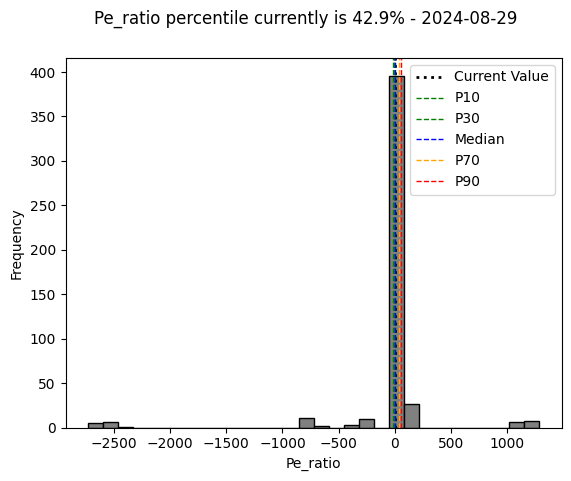

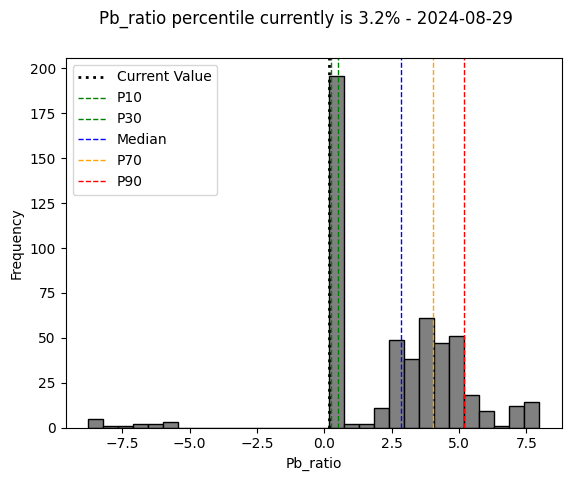

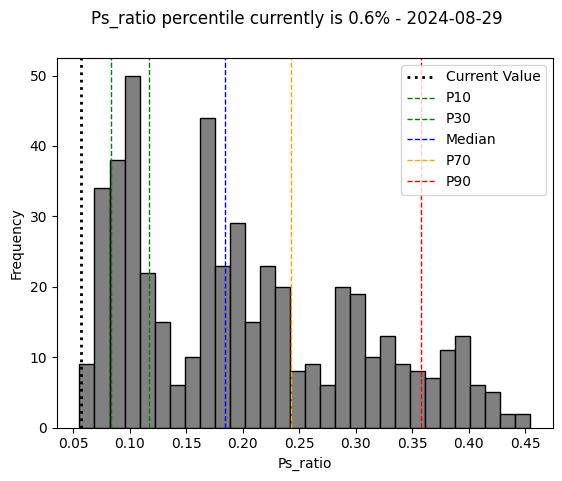

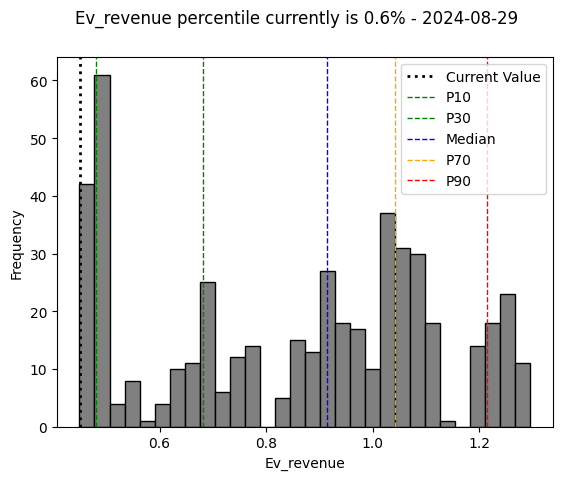

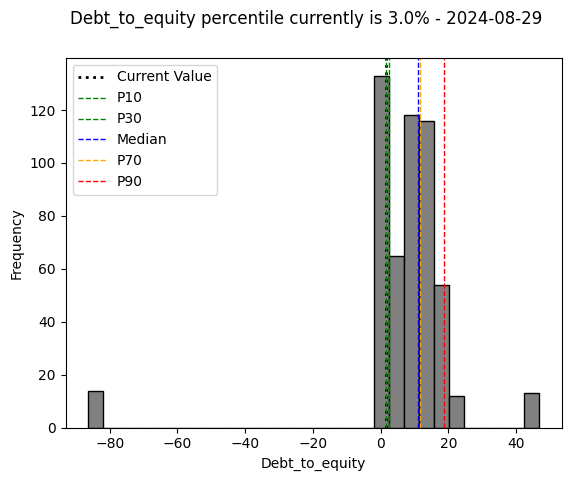

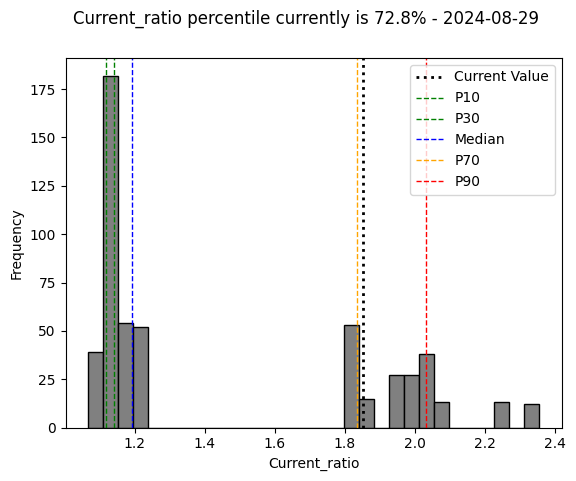

In [19]:
# plot histograms of value parameters
utils.plot_histogram_value_parameters(input_df=merged_nat_curr, extra_parameters=[], owned_shares=owned_shares)

## Calculate correlation between value parameters

In [20]:
# calulate value parameters Pearson's correlation coefficient
pd.DataFrame(merged_nat_curr, columns=['roa', 'roe', 'pe_ratio', 'pb_ratio', 'ps_ratio', 'ev_revenue', 'debt_to_equity', 'current_ratio']).corr()

,roa,roe,pe_ratio,pb_ratio,ps_ratio,ev_revenue,debt_to_equity,current_ratio
roa,1.000000,0.037684,-0.029539,0.375076,0.233661,0.123502,0.215066,-0.416895
roe,0.037684,1.000000,0.006299,-0.541671,-0.037858,0.175179,-0.919415,-0.144589
pe_ratio,-0.029539,0.006299,1.000000,-0.034425,-0.108805,-0.097232,-0.012840,0.037603
pb_ratio,0.375076,-0.541671,-0.034425,1.000000,0.749124,0.570092,0.806690,-0.551557
ps_ratio,0.233661,-0.037858,-0.108805,0.749124,1.000000,0.765412,0.306469,-0.528710
ev_revenue,0.123502,0.175179,-0.097232,0.570092,0.765412,1.000000,0.134716,-0.806219
debt_to_equity,0.215066,-0.919415,-0.012840,0.806690,0.306469,0.134716,1.000000,-0.203068
current_ratio,-0.416895,-0.144589,0.037603,-0.551557,-0.528710,-0.806219,-0.203068,1.000000


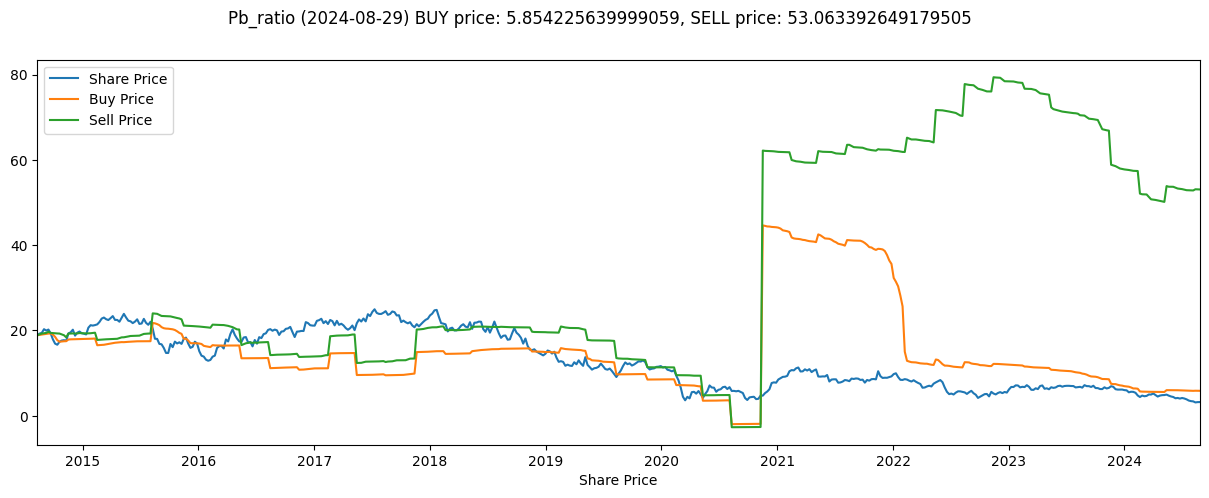

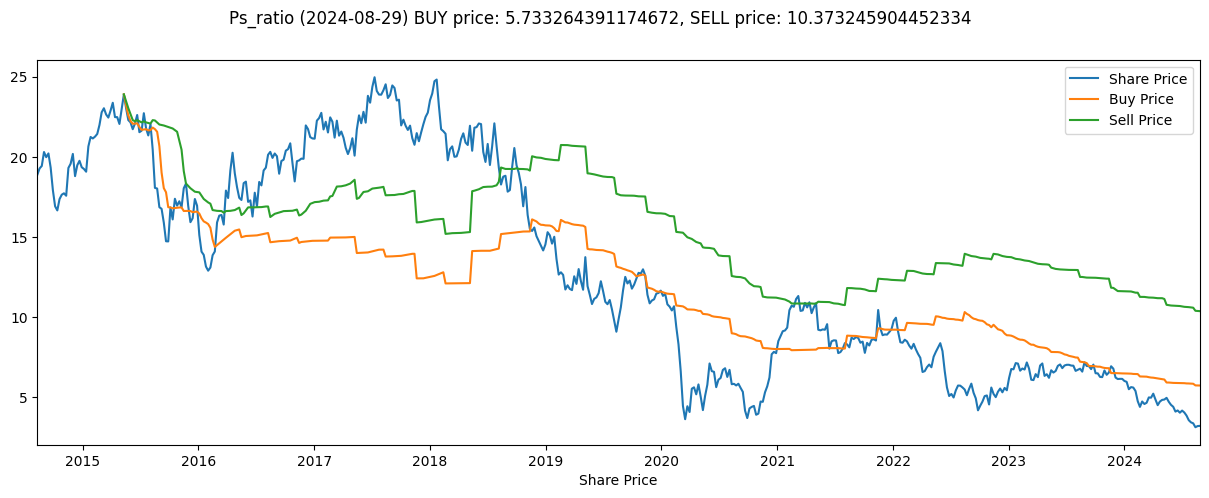

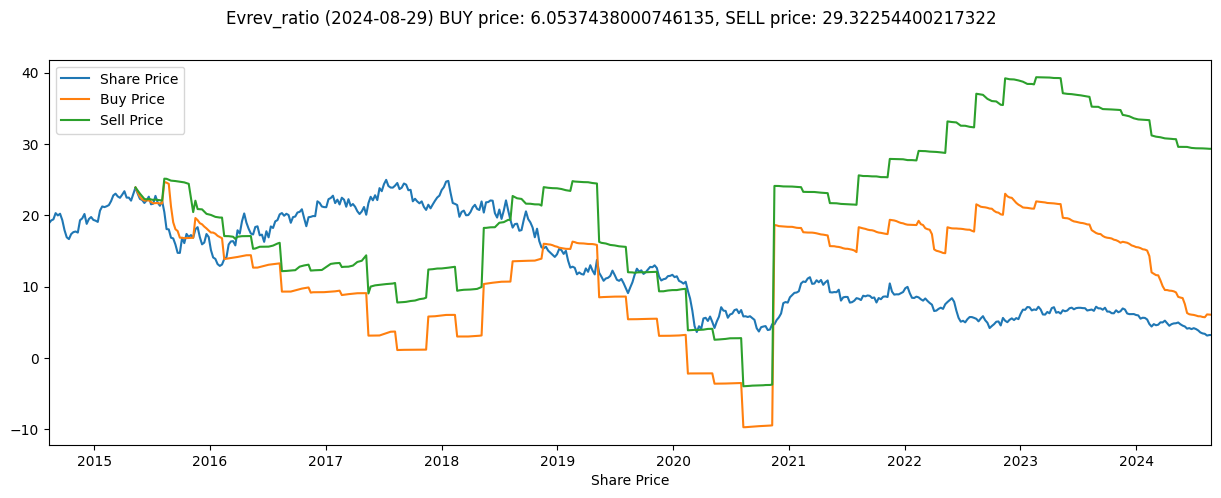

In [21]:
final_df = utils.get_value_stock_target_prices(
    input_df=merged_nat_curr,
    min_pct=0.2,
    max_pct=0.5,
    owned_shares=owned_shares
)